In [1]:
import fastai
from fastai import *
from fastai.vision import *
import torch
print(torch.__version__)
print(fastai.__version__)

1.10.0+cu111
1.0.61


# fastai
## fastai介绍
### fastai库
fastai将训练一个准确的神经网络变得十分简单。fastai库是基于他的创始人Jeremy Howard 等人开发的 Deep Learning 课程深度学习的研究，为计算机视觉、文本、表格数据、时间序列、协同过滤等`常见深度学习应用提供单一、一致界面的深度学习库`，可以做到开箱即用。这意味着，如果你已经学会用fastai创建实用的计算机视觉（CV）模型，那你就可以用同样的方法创建自然语言处理（NLP）模型，或是其他模型。


fastai 是目前把易用性和功能都做到了极致的深度学习框架，正如Jeremy所说的：如果一个深度学习框架需要写个教程给你，那它的易用性还不够好。Jeremy 说这话，不是为了夸自己，因为他甚至做了个 MOOC 出来。他自己评价说目前 fastai 的易用性依然不算成功。但在我看来它的门槛极低，你可以很轻易用几句话写个图片分类模型出来，人人都能立即上手，你甚至不需要知道深度学习的理论。


### fast.ai课程

上面说到了课程，这里对fast.ai的课程做一个简单的介绍：
课程是由kaggle赛事老司机，连续两年冠军Jeremy Howard 和 Rachel Tomas 联合创办，旨在让更多人能接受深度学习的课程，而且是完全免费！真的是业界良心，这两年深度学习火了起来，国内有培训机构推出收费课程了，教学水平参差不齐。而Jeremy和Rachel推出的课程，恰恰提现了他们的教育理念`Make deep learning uncool ! （让深度学习变得没那么高大上）

Fast.ai给人的印象一直很“接地气”：
- 研究如何快速、可靠地把最先进的深度学习应用于实际问题。
- 提供Fast.ai库，它不仅是`让新手快速构建深度学习实现的工具包`，也是提供最佳实践的一个强大而便捷的资源。
- 课程内容简洁易懂，以便尽可能多的人从研究成果和软件中收益。

### Github
这个官方的Github包含了fastai的所有内容 https://github.com/fastai 


## fastai实践
### MNIST
我们还是以最简单的MNIST来入手看看fastai都为我们做了什么

In [2]:
# 使用fastai内置的MNIST数据集，这里会从fastai的服务器下载
path = untar_data(URLs.MNIST_SAMPLE)

## URLs.MNIST_SAMPLE 只提供了3和7 两个分类的数据，这个是用来做演示的，我们正好也做个演示

In [4]:
#使用ImageDataBunch从刚才的目录中将读入数据
data = ImageDataBunch.from_folder(path)

data

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None

In [5]:
# 使用cnn_learner来创建一个learn，这里模型我们选择resnet18，使用的计量方法是accuracy准确率
learn =create_cnn(data, models.resnet18, metrics=accuracy)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [6]:
#可以直接使用train_ds来访问数据集里面的数据
img,label = data.train_ds[0]
print(label)
img

3


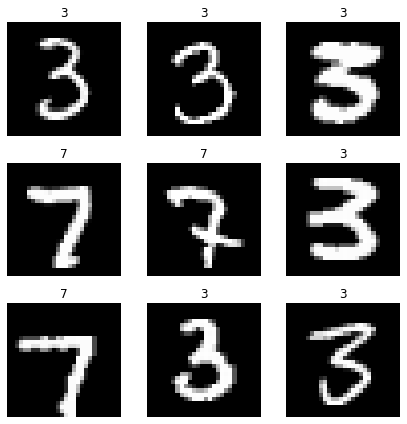

In [7]:
#或者我们直接使用show_batch方法，连标签都给我们自动生成好了
data.show_batch(rows=3, figsize=(6,6))

In [8]:
## 这里也是直接下载PyTorch官方提供的resnet18与训练模型

!wget -P /Users/tant/.torch/models/ https://download.pytorch.org/models/resnet18-5c106cde.pth

--2022-01-02 02:15:35--  https://download.pytorch.org/models/resnet18-5c106cde.pth
Resolving download.pytorch.org (download.pytorch.org)... 13.226.52.90, 13.226.52.51, 13.226.52.36, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.226.52.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46827520 (45M) [application/octet-stream]
Saving to: ‘/Users/tant/.torch/models/resnet18-5c106cde.pth’

resnet18-5c106cde.p 100%[===================>]  44.66M  16.8MB/s    in 2.7s    

2022-01-02 02:15:38 (16.8 MB/s) - ‘/Users/tant/.torch/models/resnet18-5c106cde.pth’ saved [46827520/46827520]



In [9]:
# 使用learn的fit方法就可以进行训练了，训练一遍
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.171417,0.108079,0.968106,01:16


经过上面的训练，你一定会很纳闷：
- 没有告诉模型类别有几个
- 没有指定任务迁移之后接续的几个层次的数量、大小、激活函数
- 没有告诉网络损失函数是什么

我几乎没有提供任何的信息，网络就开始训练了？

对，不需要。

因为 fastai 根据你输入的上述“数据”、“模型结构”和“损失度量”信息，自动帮你把这些闲七杂八的事情默默搞定了。

下面再介绍一些训练的高级用法

In [10]:
#从新生成一个数据集
learn2 =create_cnn(data, models.resnet18, metrics=accuracy,callback_fns=ShowGraph)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


这里我们使用fit_one_cycle方法。

fit_one_cycle使用的是一种`周期性学习率`，从较小的学习率开始学习，缓慢提高至较高的学习率，然后再慢慢下降

周而复始，每个周期的长度略微缩短，在训练的最后部分，允许学习率比之前的最小值降得更低。

这不仅`可以加速训练`，还有助于`防止模型落入损失平面的陡峭区域`，使模型更倾向于寻找更平坦的极小值，从而`缓解过拟合现象`。

epoch,train_loss,valid_loss,accuracy,time
0,0.217780,0.129729,0.957802,01:21


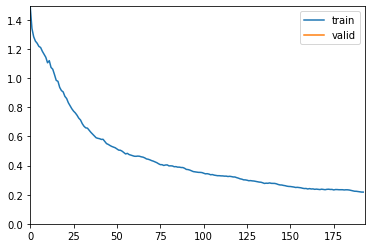

In [11]:
learn2.fit_one_cycle(1)

我们使用内置ShowGraph的方法直接打印训练的状态，如果我们需要更详细的状态，可以直接调用一下的方法：

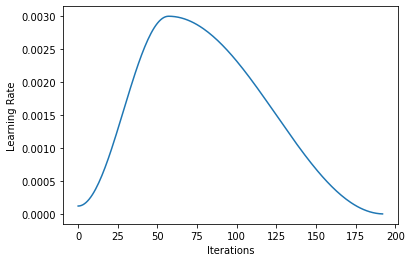

In [12]:
# 学习率的变更
learn2.recorder.plot_lr()

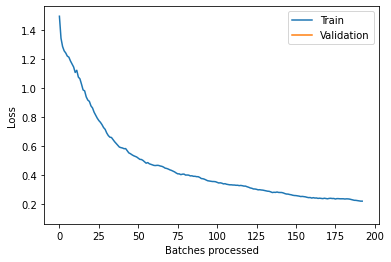

In [13]:
#损失
learn2.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


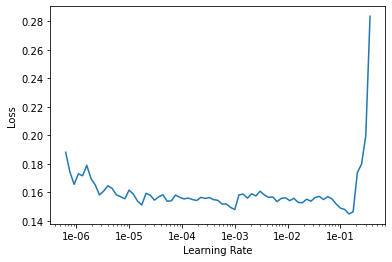

In [14]:
# 我们也可以使用lr_find()找到损失仍在明显改善最高学习率
learn2.lr_find()
learn2.recorder.plot()

## fastai文档翻译
由于fastai的中文资料很少而且目前官方只提供英文的文档。

PS:对于定制化来说可能效果也比较有限？